In [52]:
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import plot_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [53]:
(train_data , train_targets), (test_data, test_targets) = boston_housing.load_data()
print (train_data.shape)
print (train_targets.shape)
print (test_data.shape)
print (test_targets.shape)

(404, 13)
(404,)
(102, 13)
(102,)


In [54]:
train_data = (train_data - train_data.mean(axis=0)) / train_data.std(axis=0)
test_data = (test_data - test_data.mean(axis=0)) / test_data.std(axis=0)


In [55]:
model = Sequential()
model.add(Input(shape=(13,), name='input-layer'))
model.add(Dense(64, activation='relu', name='hidden-layer-1'))
model.add(Dense(1 , name='output-layer'))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

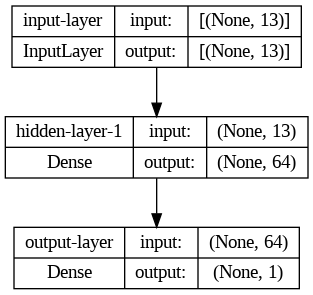

In [56]:
plot_model(model, show_shapes=True)

In [57]:
history = model.fit(train_data,train_targets, epochs = 10, batch_size = 1, validation_split = 0.2, verbose = True)

Epoch 1/10
323/323 [==============================] - 1s 3ms/step - loss: 410.0470 - mae: 18.0638 - val_loss: 288.8868 - val_mae: 14.6399
Epoch 2/10
323/323 [==============================] - 1s 2ms/step - loss: 122.4809 - mae: 8.2773 - val_loss: 93.8697 - val_mae: 6.7657
Epoch 3/10
323/323 [==============================] - 1s 2ms/step - loss: 50.7935 - mae: 4.7798 - val_loss: 60.0694 - val_mae: 5.1762
Epoch 4/10
323/323 [==============================] - 1s 2ms/step - loss: 36.7514 - mae: 3.9883 - val_loss: 46.4336 - val_mae: 4.4340
Epoch 5/10
323/323 [==============================] - 1s 2ms/step - loss: 30.8651 - mae: 3.5532 - val_loss: 37.4683 - val_mae: 3.9961
Epoch 6/10
323/323 [==============================] - 1s 2ms/step - loss: 26.9124 - mae: 3.3014 - val_loss: 33.3552 - val_mae: 3.7870
Epoch 7/10
323/323 [==============================] - 1s 2ms/step - loss: 24.3007 - mae: 3.0936 - val_loss: 28.6336 - val_mae: 3.5558
Epoch 8/10
323/323 [==============================] - 1s 

In [58]:
predictions = model.predict(test_data)

4/4 [==============================] - 0s 3ms/step


In [59]:
mse = mean_squared_error(test_targets,predictions)
print("Mean squared Error :", mse)

mae = mean_absolute_error(test_targets,predictions)
print("Mean squared Error :", mae)

r2 = r2_score(test_targets,predictions)
print("Mean squared Error :", r2)

Mean squared Error : 18.488624065077474
Mean squared Error : 3.2769788910360904
Mean squared Error : 0.777898014161613


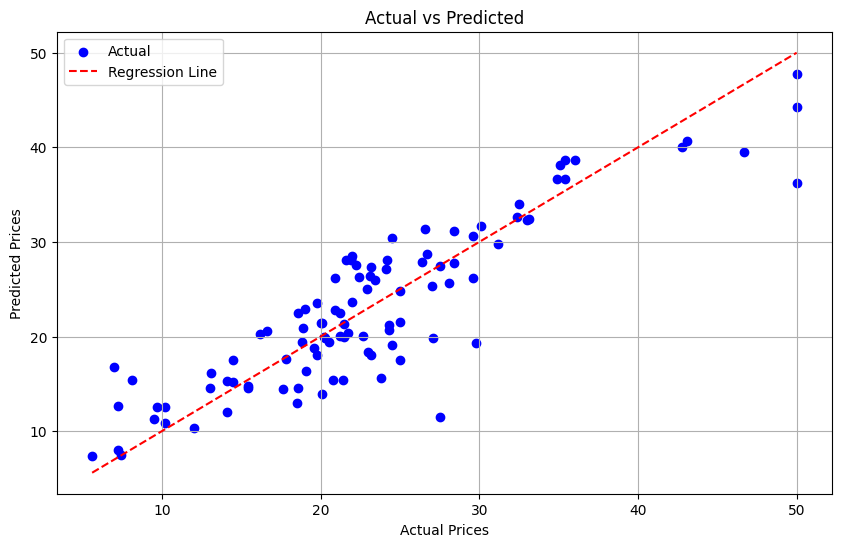

In [60]:
import numpy as np

# Plotting the actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(test_targets, predictions, color='blue', label='Actual')
plt.plot([min(test_targets), max(test_targets)], [min(test_targets), max(test_targets)], color='red', linestyle='--', label='Regression Line')
plt.title('Actual vs Predicted')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.grid(True)
plt.show()